In [1]:
%matplotlib inline


# Tri-Polar Grid Projected Plotting

This example demonstrates cell plots of data on the semi-structured ORCA2 model
grid.

First, the data is projected into the PlateCarree coordinate reference system.

Second four pcolormesh plots are created from this projected dataset,
using different projections for the output image.


/miniconda3/envs/py3_std/lib/python3.7/site-packages/iris/analysis/cartography.py:634: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  "Coordinate system of latitude and longitude "
/miniconda3/envs/py3_std/lib/python3.7/site-packages/iris/coords.py:1808: UserWarning: Coordinate 'projection_x_coordinate' is not bounded, guessing contiguous bounds.
  "contiguous bounds.".format(self.name())
/miniconda3/envs/py3_std/lib/python3.7/site-packages/iris/coords.py:1808: UserWarning: Coordinate 'projection_y_coordinate' is not bounded, guessing contiguous bounds.
  "contiguous bounds.".format(self.name())
/miniconda3/envs/py3_std/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


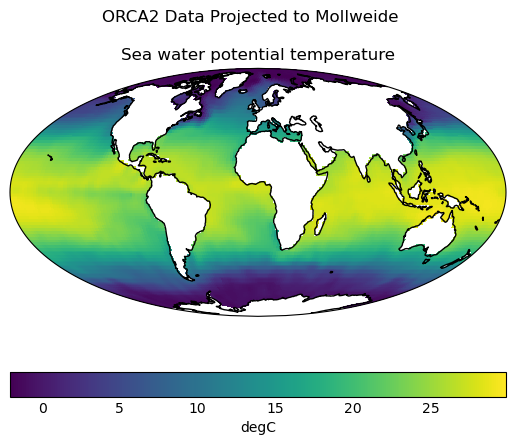

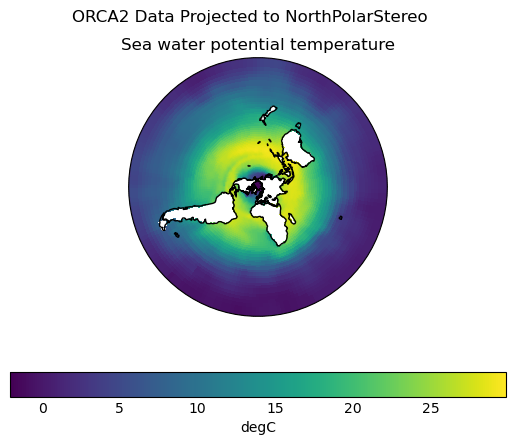

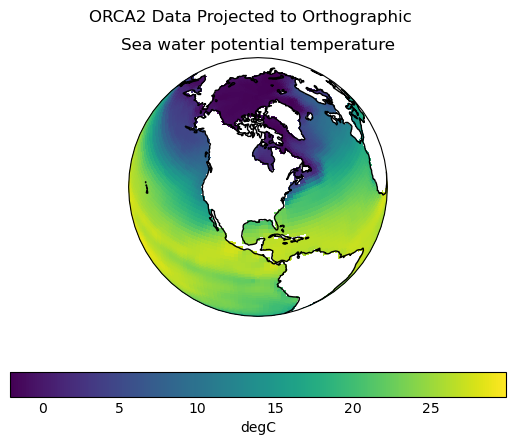

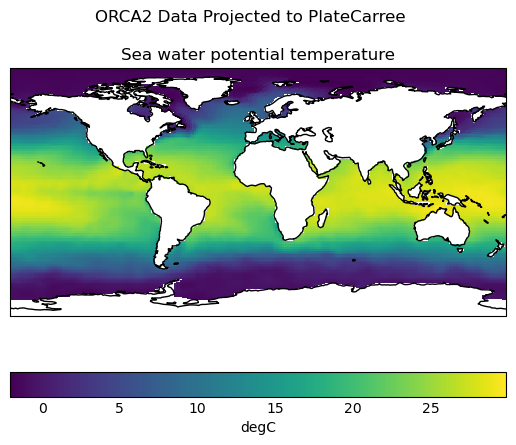

In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import iris
import iris.analysis.cartography
import iris.plot as iplt
import iris.quickplot as qplt


def main():
    # Load data
    filepath = iris.sample_data_path("orca2_votemper.nc")
    cube = iris.load_cube(filepath)

    # Choose plot projections
    projections = {}
    projections["Mollweide"] = ccrs.Mollweide()
    projections["PlateCarree"] = ccrs.PlateCarree()
    projections["NorthPolarStereo"] = ccrs.NorthPolarStereo()
    projections["Orthographic"] = ccrs.Orthographic(
        central_longitude=-90, central_latitude=45
    )

    pcarree = projections["PlateCarree"]
    # Transform cube to target projection
    new_cube, extent = iris.analysis.cartography.project(
        cube, pcarree, nx=400, ny=200
    )

    # Plot data in each projection
    for name in sorted(projections):
        fig = plt.figure()
        fig.suptitle("ORCA2 Data Projected to {}".format(name))
        # Set up axes and title
        ax = plt.subplot(projection=projections[name])
        # Set limits
        ax.set_global()
        # plot with Iris quickplot pcolormesh
        qplt.pcolormesh(new_cube)
        # Draw coastlines
        ax.coastlines()

        iplt.show()


if __name__ == "__main__":
    main()